In [1]:
import pandas as pd

In [2]:
!git clone https://github.com/stushar12/Fake-News-Detection.git

Cloning into 'Fake-News-Detection'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 75 (delta 22), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [3]:
!unrar x "/content/Fake-News-Detection/datsaset/Fake News Detection.part1.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Fake-News-Detection/datsaset/Fake News Detection.part1.rar

Extracting  test.csv                                                      11% 20%  OK 
Extracting  train.csv                                                     32% 44% 56% 68% 70%

Extracting from /content/Fake-News-Detection/datsaset/Fake News Detection.part2.rar

...         train.csv                                                     82% 94% 99%  OK 
All OK


In [4]:
!unrar x "/content/Fake-News-Detection/datsaset/Fake News Detection.part2.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Fake-News-Detection/datsaset/Fake News Detection.part2.rar


Extracting from /content/Fake-News-Detection/datsaset/Fake News Detection.part1.rar


Would you like to replace the existing file test.csv
25144581 bytes, modified on 2019-11-29 01:52
with a new one
25144581 bytes, modified on 2019-11-29 01:52

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit N


Would you like to replace the existing file train.csv
98628550 bytes, modified on 2019-11-29 01:52
with a new one
98628550 bytes, modified on 2019-11-29 01:52

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit N


Extracting from /content/Fake-News-Detection/datsaset/Fake News Detection.part2.rar

No files to extract


In [5]:
df=pd.read_csv("/content/train.csv")

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

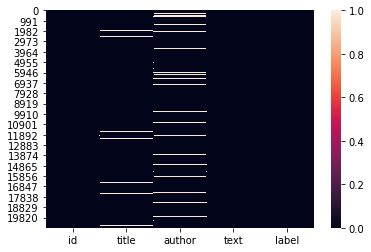

In [8]:
import seaborn as sns
sns.heatmap(df.isna())

In [9]:
df.shape

(20800, 5)

In [10]:
###Drop Nan Values
df=df.dropna()

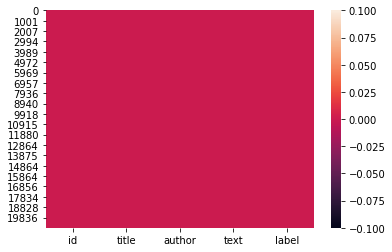

In [12]:
sns.heatmap(df.isna())

In [13]:
df.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [14]:
df.shape

(18285, 5)

In [15]:
## Get the Independent Features
X=df.drop('label',axis=1)

In [16]:
y=df['label']

In [17]:
y.shape

(18285,)

In [18]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [19]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [20]:
### Vocabulary size
voc_size=15000

# **Onehot Representation**

In [21]:
messages=X.copy()

In [22]:
messages['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [23]:
messages.reset_index(inplace=True)

In [24]:
messages.drop(columns=["index","id","author"],axis=1,inplace=True)

In [25]:
messages

,title,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...
...,...,...
18280,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...
18281,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...
18282,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...
18283,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal..."


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download("all")

In [27]:
stop_words=set(stopwords.words("english"))

In [216]:
### Dataset Preprocessing

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(messages)):
    if i==1:
      break
    str1=messages['title'][i]
    str2=messages['text'][i]
    str3=str1+" "+str2
    review = re.sub('[^a-zA-Z]', ' ',str3)
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if word not in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [217]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted house dem aide even see comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative common license apology keith olbermann doubt worst person world week fbi director james comey according house democratic aide look like also know second worst person well turn comey sent infamous letter announcing fbi looking email may related hillary clinton email server ranking democrat relevant committee hear comey found via tweet one republican committee chairman know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existence email appear pertinent investigation case reopened ja

In [218]:
max_len=0
for i in range(0,len(corpus)):
  if(len(corpus[i].split())>max_len):
    max_len=len(corpus[i].split())

In [219]:
max_len

443

# **One Hot Encoding**

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

# **Embedding Representation**

In [33]:
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=max_len)
print(embedded_docs)

[[    0     0     0 ...  6953  3065 10793]
 [    0     0     0 ...  1082  7730 10957]
 [    0     0     0 ... 14945  3066  6278]
 ...
 [    0     0     0 ...  2084 13958  6858]
 [    0     0     0 ... 13165  5545  8754]
 [    0     0     0 ...  9729 10480  6831]]


In [34]:
embedded_docs[0].shape

(12065,)

In [35]:
from tensorflow.keras.layers import Dropout,BatchNormalization
## Creating model
embedding_vector_features=50
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=max_len))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
len(embedded_docs),y.shape

(18285, (18285,))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 12065, 50)         750000    
_________________________________________________________________
dropout (Dropout)            (None, 12065, 50)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 810,501
Trainable params: 810,501
Non-trainable params: 0
_________________________________________________________________


In [38]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [39]:
X_final.shape,y_final.shape

((18285, 12065), (18285,))

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=0)

# **Model Training**

In [42]:
model_fit=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=128)

Epoch 1/10
100/100 [==============================] - 95s 946ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.3688 - val_accuracy: 0.9198
Epoch 2/10
100/100 [==============================] - 94s 946ms/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.3571 - val_accuracy: 0.9307
Epoch 3/10
100/100 [==============================] - 95s 947ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.3167 - val_accuracy: 0.9191
Epoch 4/10
100/100 [==============================] - 94s 946ms/step - loss: 0.0097 - accuracy: 0.9973 - val_loss: 0.3330 - val_accuracy: 0.9229
Epoch 5/10
100/100 [==============================] - 94s 944ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.3513 - val_accuracy: 0.9293
Epoch 6/10
100/100 [==============================] - 94s 945ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.3496 - val_accuracy: 0.9285
Epoch 7/10
100/100 [==============================] - 94s 945ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.3650 - val_ac

# **Performance Metrics And Accuracy**

In [119]:
X_test.shape

(5486, 12065)

In [43]:
y_pred=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [128]:
y_pred.

(5486, 1)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [45]:
cm=confusion_matrix(y_test,y_pred)

In [46]:
accuracy_score(y_test,y_pred)

0.9247174626321546

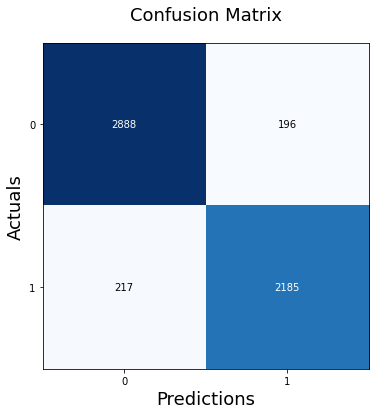

In [48]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
 
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [51]:
valid_dataset=pd.read_csv("validation.csv") # Model doesn't know about this data

In [253]:
def preprocess(text):
  from nltk.stem import WordNetLemmatizer
  lemmatizer = WordNetLemmatizer()
  corpus = []
  review = re.sub('[^a-zA-Z]', ' ',text)
  review = review.lower()
  review = review.split()

  review = [lemmatizer.lemmatize(word) for word in review if word not in stop_words]
  review = ' '.join(review)
  corpus.append(review)

  onehot_repr=[one_hot(words,5000)for words in corpus] 
  ans= np.argmax(model.predict(onehot_repr), axis=-1)
  return ans


In [236]:
valid_dataset.head(10)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
10,20810,184 U.S. generals and admirals endorse Trump f...,Dr. Eowyn,Have you seen that pro-Hillary TV ad of disgra...
11,20811,“Working Class Hero” by John Brennon,Doug Diamond,"Source: CNBC, article by Robert Ferris Arctic ..."
12,20812,The Rise of Mandatory Vaccinations Means the E...,Shaun Bradley,Written by Shaun Bradley Mandatory vaccinati...
13,20813,Communists Terrorize Small Business,Steve Watson,Store Communists Terrorize Small Business The ...


In [100]:
valid_dataset.isna().sum()   

id          0
title     122
author    503
text        7
dtype: int64

In [102]:
valid_dataset.dropna(inplace=True)

In [103]:
testing=valid_dataset.copy()

In [105]:
testing.drop(columns=["id","author"],axis=1,inplace=True)

In [252]:
testing.head()

,title,text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning..."
2,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...
3,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different..."
4,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...
6,Pelosi Calls for FBI Investigation to Find Out...,"Sunday on NBC’s “Meet the Press,” House Minori..."


In [136]:
id_20800="Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York Times" + " "+"PALO ALTO, Calif.  —   After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy   epithet. One prominent tech chieftain says the consequences of Mr. Trump’s election would “range between disastrous and terrible. ” Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of “anger” and “bigotry. ” Not quite all the action is  . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported on Saturday that Mr. Thiel is giving $1. 25 million to support Mr. Trump’s candidacy even as other supporters flee. (He also recently gave $1 million to a “super PAC” that supports Senator Rob Portman, the Republican freshman running for   in Ohio.) Getting involved in politics used to be seen as clashing with Silicon Valley’s value system: You transform the world by making problems obsolete, not solving them through Washington. Nor did entrepreneurs want to alienate whatever segment of customers did not agree with them politically. Such reticence is no longer in style here. “We’re a bunch of nerds not used to having a lot of limelight,” said Dave McClure, an investor who runs a tech incubator called 500 Startups. “But to quote   ‘With great power comes great responsibility. ’” Mr. McClure grew worried after the Republican and Democratic conventions as Mr. Trump began to catch up to Hillary Clinton in the polls. He wanted Silicon Valley to do more, and so late last month he announced Nerdz4Hillary, an informal   effort. An initial group of donors pledged $50, 000 the goal was to ask the “nerdz” for small donations to match that sum. They have not come through yet. “We’re kind of optimistic we’ll get the other $50, 000 in a few weeks,” Mr. McClure said. That relatively slow pace reflects Silicon Valley’s shifting position: Even as it becomes increasingly free with its opinions, it has been less free with its checkbook. The most recent data, from late August, shows Mrs. Clinton taking in $7. 7 million from the tech community, according to Crowdpac, a   that tracks donations. By that point in 2012, Crowdpac says, President Obama had raised $21 million from entrepreneurs and venture capitalists. Reid Hoffman, the billionaire   of the business networking site LinkedIn, offers a snapshot of Silicon Valley’s evolving approach to politics. Mr. Hoffman was a top Obama donor, giving $1 million to the Priorities USA political action committee, something several of his peers did as well. Last month, Mr. Hoffman garnered worldwide publicity for saying he would donate up to $5 million to veterans’ groups if Mr. Trump released his taxes, a remote possibility that never came to pass. He has castigated Mr. Trump in interviews, saying he was speaking for those who were afraid. Mr. Hoffman’s outright donations, however, have been smaller this election cycle. In May, he gave $400, 000 to the Hillary Victory Fund. Asked if there was more recent giving that had not shown up in federal election records, Mr. Hoffman cryptically responded in an email, “Looking at some PACs, etc. ” He declined several opportunities to elaborate. Even as Priorities USA has raised $133 million this election cycle, far exceeding its total in 2012, its tech contributions have dwindled. The only familiar tech name this time around is John Doerr of the venture capital firm Kleiner Perkins Caufield  Byers, who gave $500, 000. The AOL   Steve Case said his September endorsement of Mrs. Clinton, via an   in The Washington Post, was the first time he ever publicly declared for a candidate. “I always focused on policy and avoided politics,” he said. “But if Trump were elected president, I would be disappointed in myself for not acting. ” When he wrote the   he was uncertain about donating money to Mrs. Clinton, saying only that it was “probable. ” A spokeswoman said Sunday that Mr. Case gave $25, 000 to the Hillary Victory Fund. Mason Harrison, Crowdpac’s head of communications, offered a possible reason for Mrs. Clinton’s    support. “Donors give to support candidates they love, not to defeat candidates they fear,” he said. A few billionaires are acting instead of talking. Dustin Moskovitz, a founder of Facebook, said he was giving $20 million to various Democratic election efforts  —   the first time he and his wife, Cari Tuna, have endorsed a candidate. He declined to be interviewed. Part of the problem for Mrs. Clinton is that, however preferable she may be to Mr. Trump in the tech community, she pales in comparison to President Obama. After some initial misgivings, Silicon Valley found its champion in him. There has been a revolving door between tech and the Obama administration, just as previous Democratic administrations had a revolving door with Wall Street. In June, President Obama seemed to suggest that he might become a venture capitalist after his term ends. Mrs. Clinton is not as enthusiastic toward Silicon Valley and its disruptive ways. In a speech in the summer of 2015, she noted that   in the “  or   gig economy”  —   Uber, Airbnb and their ilk  —   were “unleashing innovation” but also “raising hard questions about workplace protection and what a good job will look like in the future. ” The Clinton campaign declined to comment. The Trump campaign did not respond to a query. Even as Silicon Valley works against Mr. Trump, there is quiet acknowledgment that his campaign has bared some important issues. In an endorsement this month of Mrs. Clinton, the venture capital firm Union Square Ventures pointed out that “the benefits of technology and globalization have not been evenly distributed,” and that this needed to change. If Silicon Valley’s political involvement outlasts this unusual election, the tech community may start contributing more to the process than commentary and cash. “Not only are tech people going to be wielding influence, but they’re going to be the candidate,” Mr. McClure said. “Reid Hoffman, Sheryl Sandberg”  —   the chief operating officer of Facebook  —   “and a bunch of other folks here have political aspirations. ” Others may be inspired to enter politics through other doors. Palmer Luckey is the    founder of the Oculus virtual reality company, which he sold to Facebook for $2 billion. Mr. Luckey donated $10, 000 to a group dedicated to spreading    messages about Mrs. Clinton both online and off. The group’s first billboard, said to be outside Pittsburgh, labeled her “Too Big to Jail. ” Mr. Luckey told The Daily Beast that his thinking “went along the lines of, ‘Hey, I have a bunch of money. I would love to see more of this stuff. ’” He added, “I thought it sounded like a real jolly good time. ” Many virtual reality developers were less happy, and Mr. Luckey quickly posted his regrets on Facebook. He declined to comment further. “If we’re going to be more vocal, we’ll have to live more transparently,” said Hunter Walk, a venture capitalist whose campaign to persuade tech companies to give workers Election Day off signed up nearly 300 firms, including Spotify, SurveyMonkey and TaskRabbit. “There will be a period of adjustment. ” But perhaps being vocal is a temporary condition after all. The venture firm CRV was in the spotlight at the end of August with its blunt   message, which included the earthy epithet. A few weeks later, it cleaned up its website. The partners went from employing a publicist to seek out attention to declining interviews. “We reached everyone we wanted to reach, and hopefully influenced opinions,” said Saar Gur, a CRV venture capitalist. “Then the buzz died down and we went back to our day jobs, which are super busy. " 

In [254]:
preprocess(id_20800)

array([0])